# Analysing Top 5 features influencing House SalePrices with Ames Housing Dataset.
#### EDA with Pandas 

## Introduction

In this section, I will import, clean up, analyze (using descriptive statistics) and visualize the Ames Housing dataset. In this cumulative lab, i will practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives i


#### 1. load data with pandas

#### 2. Explore Data Distributions
   * Practice calculating measures of centrality and dispersion with pandas

#### 3. Explore Differences between Subsets
   * Practice creating subsets of data with pandas

#### 4. Cleaning up the data

#### 5. Explore Correlations

#### 6. Engineer and Explore a New Feature
   * Create a new column 'Age' that determines how old the house was during the sale
   * Practice using data visualizations to explore data, and interpreting those visualizations
   * Perform a full exploratory data analysis process to gain insight about a dataset 

##  Exploring the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**OverallQual**: `Overall Quality of the House`


## **Objectives ii**
#### i. To find out how Total Rooms Above Grade affect the SalePrice
#### ii. To find out how Overall Condition affect the SalePrice
#### iii. To find the top features that mostly and least affect the SalePrice
#### iv. To find out how Age affects the SalePrice


### Research 
#### i. How does the Total Room Grading affect the SalePrice?
#### ii. How does the Overall Condition affect the SalePrice?
#### iii. What is the top factor that mostly affect the SalePrice of Housing and the top factor that least affect the SalePrice of Housing
#### iv. How does Age affect SalePrice?


#### 1. Load the Dataset with Pandas
Import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [14]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col = 0)

The following code checks that you loaded the data correctly:

In [4]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [5]:
# This code prints the DataFrame
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [6]:
# this code gives the description of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

The cell below, shows a histogram for `SalePrice`.

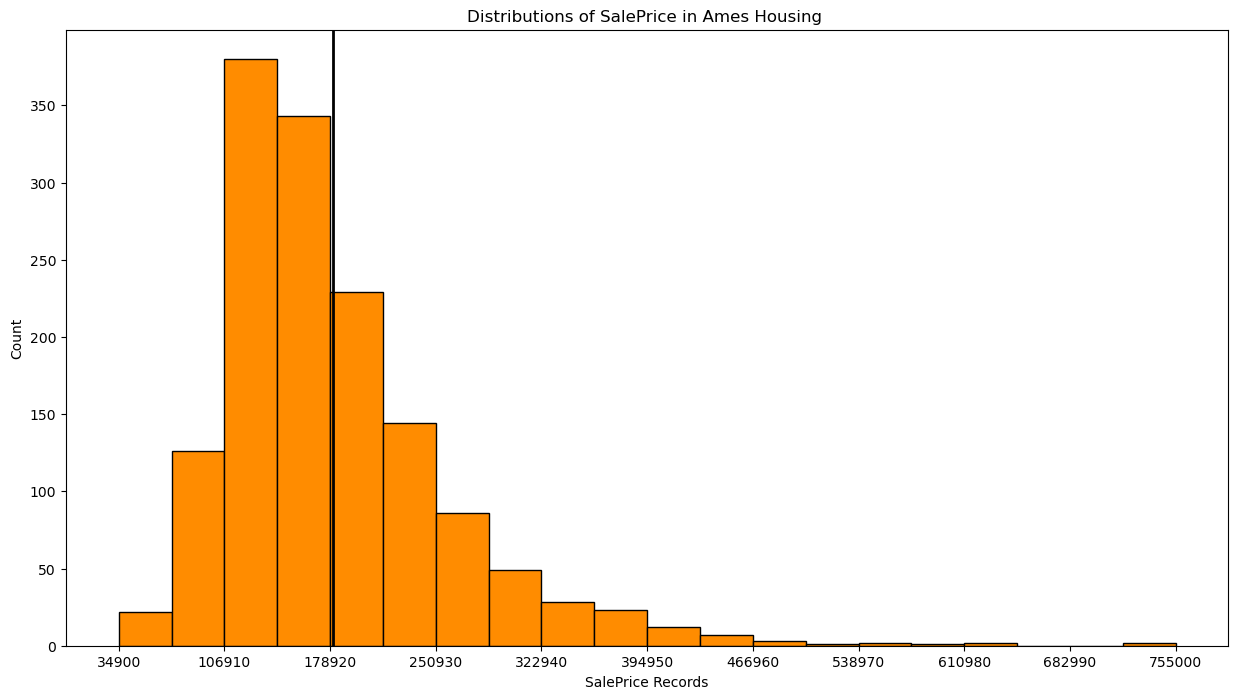

In [7]:
# Plot the distribution of the SalePrice
import numpy as np

ax =df['SalePrice'].plot(kind = 'hist', figsize = (15,8), bins= 20, color= 'darkorange', edgecolor='black')

# Set the x_ticks to start at the min of the SalePrice and stop at the max of the SalePrice
xticks = np.linspace(start = df['SalePrice'].min(), stop = df['SalePrice'].max(), num = 11)
ax.set_xticks(xticks)

#Set the Title , xlabel, and ylabel
ax.set_title("Distributions of SalePrice in Ames Housing ")
ax.set_xlabel("SalePrice Records")
ax.set_ylabel("Count")

# Set the black vertical line indicating the mean 
mu = df['SalePrice'].mean()
ax.axvline(mu, color = 'black', linewidth=2);

Now, print out the mean, median, and standard deviation:

In [8]:
print("The mean of the SalePrice is: ", round(df['SalePrice'].mean(), 1))
print("The median of the SalePrice is: ", round(df['SalePrice'].median(), 1))
print("The standard deviation of the SalePrice is: ", round(df['SalePrice'].std(), 1))

The mean of the SalePrice is:  180921.2
The median of the SalePrice is:  163000.0
The standard deviation of the SalePrice is:  79442.5


In the cell below, is the interpretation of the above information.

In [ ]:

"""
The plot describes the Distributions of SalePrice in Ames Housing.

The average SalePrice of Ames Housing is 180921.1 which in the plot is indicated with the black vertical line 
which is also approximately at the 180921 value in the x axis.

The most centralised number after the values are arranged in ascending order 
which is the median of the Saleprice column is 163000.0.

79442.5 which is the Standard deviation shows on average how far each record lies from the mean.
"""

## Total Rooms Above Grade

### i. How does the Total Room Grading affect the SalePrice?
In the cell below, is a histogram for `TotRmsAbvGrd`.

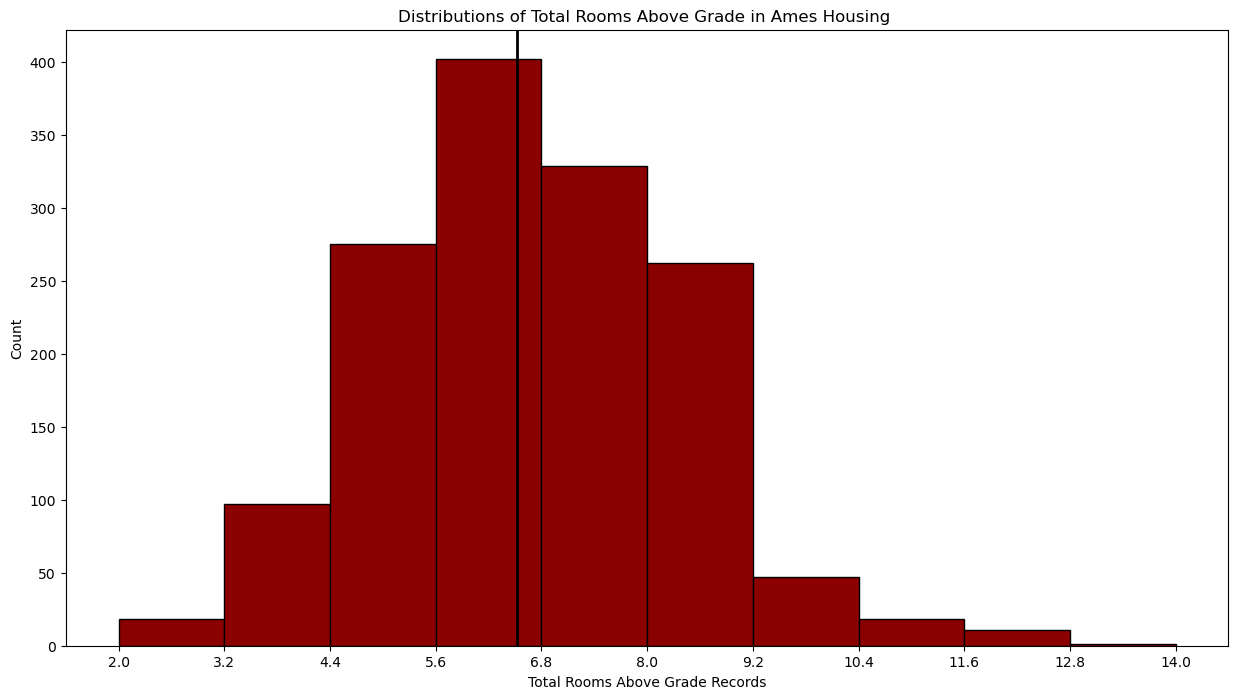

In [9]:
# Plot the distribution of the Total Rooms Above Grade
import numpy as np
ax = df['TotRmsAbvGrd'].plot(kind = 'hist', figsize = (15,8), color= 'darkred', edgecolor='black')

# Set the x_ticks to start at the min of the TotRmsAbvGrd and stop at the max of the TotRmsAbvGrd
xticks = np.linspace(start = df['TotRmsAbvGrd'].min(), stop = df['TotRmsAbvGrd'].max(), num = 11)
ax.set_xticks(xticks)

#Set the Title , xlabel, and ylabel
ax.set_title("Distributions of Total Rooms Above Grade in Ames Housing ")
ax.set_xlabel("Total Rooms Above Grade Records")
ax.set_ylabel("Count")

# Set the black vertical line indicating the mean 
mu = df['TotRmsAbvGrd'].mean()
ax.axvline(mu, color = 'black', linewidth=2);

Now, print out the mean, median, and standard deviation:

In [10]:
print("The mean of the Total Rooms Above Grade is: ", round(df['TotRmsAbvGrd'].mean(), 2))
print("The median of the Total Rooms Above Grade is: ", round(df['TotRmsAbvGrd'].median(), 2))
print("The standard deviation of the Total Rooms Above Grade is: ", round(df['TotRmsAbvGrd'].std(), 2))

The mean of the Total Rooms Above Grade is:  6.52
The median of the Total Rooms Above Grade is:  6.0
The standard deviation of the Total Rooms Above Grade is:  1.63


In [ ]:

"""
The plot describes the Distributions of Total Rooms Above Grade in Ames Housing.

The mean of the Total Rooms Above Grade column is 6.52 which in the plot is indicated with the black vertical line
which is also approximately at the 6.52 value in the x axis.

The most centralised number after the values are arranged in ascending order which is the median of the Total Rooms Above Grade
column is 6.0.

1.63 which is the Standard deviation shows on average how far each record lies from the mean.

"""

## i. To find out how Total Rooms Above Grade affect the SalePrice

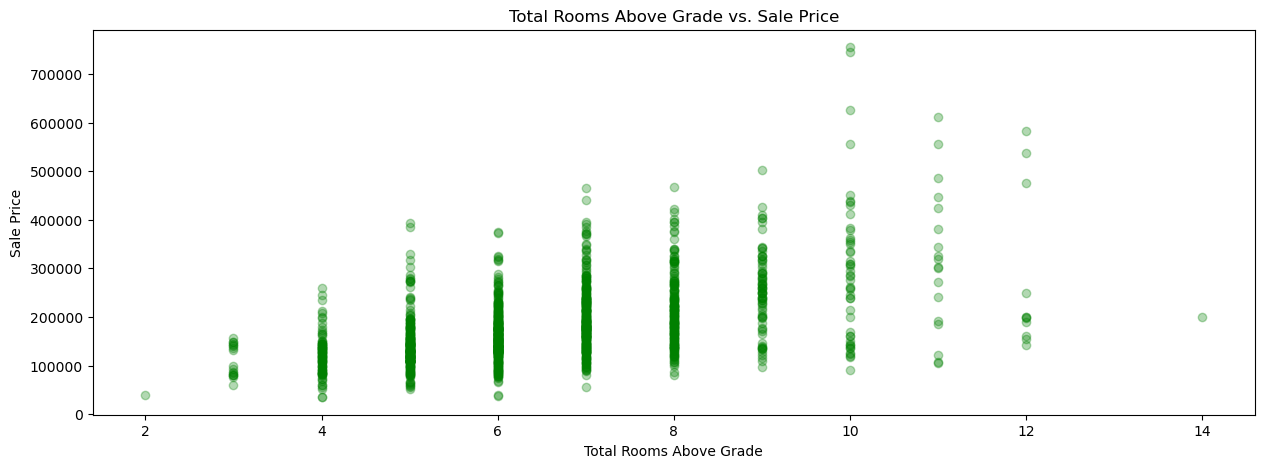

In [10]:
# Setting up the plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["TotRmsAbvGrd"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Total Rooms Above Grade vs. Sale Price")
ax.set_xlabel("Total Rooms Above Grade")
ax.set_ylabel("Sale Price");

In the cell below,is the interpretation of the above information.

In [ ]:
"""

In the plot above the trend of the dots increases from left to right.

The second plot shows that there is a positive correlation between the Total Rooms Above Grade and the SalePrice therefore, as 
the number of rooms above grade increases the SalePrice increases.
"""

## Overall Condition

### ii. How does the Overall Condition affect the SalePrice?

In the cell below, is a histogram for `OverallCond`.

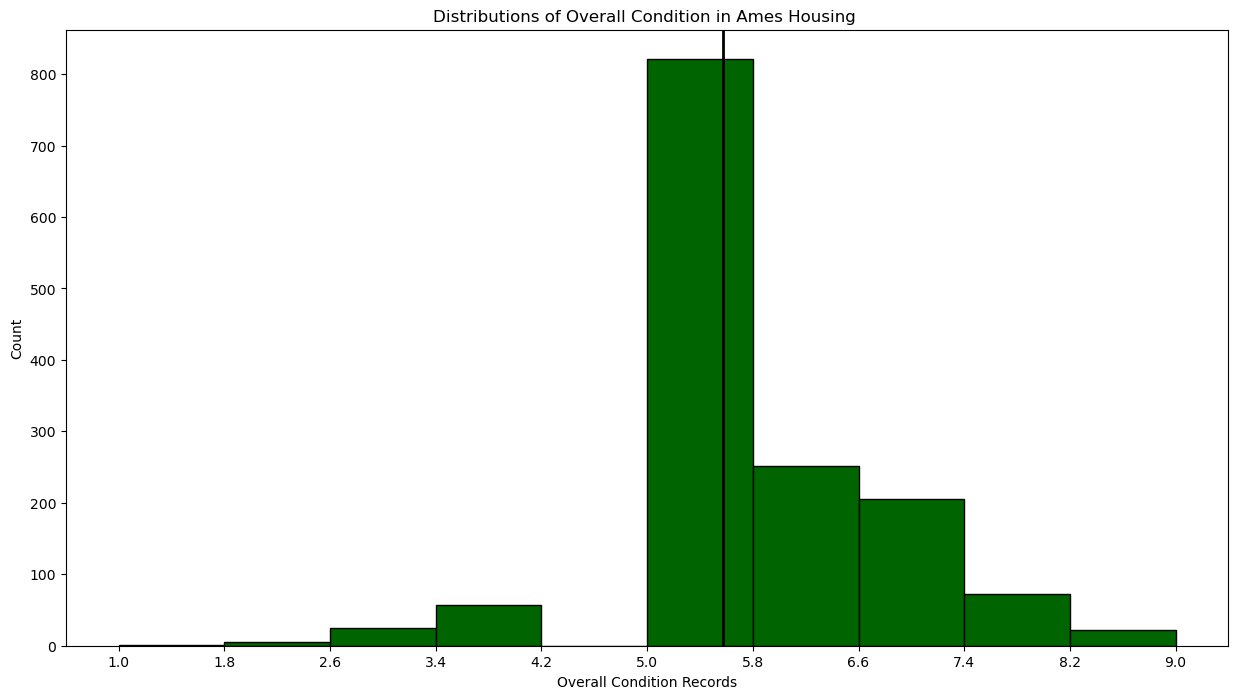

In [11]:
# Plot the distribution of the Overall Condition
import numpy as np
ax = df['OverallCond'].plot(kind = 'hist', figsize = (15,8), color= 'darkgreen', edgecolor='black')

# Set the x_ticks to start at the min of the TotRmsAbvGrd and stop at the max of the TotRmsAbvGrd
xticks = np.linspace(start = df['OverallCond'].min(), stop = df['OverallCond'].max(), num = 11)
ax.set_xticks(xticks)

#Set the Title , xlabel, and ylabel
ax.set_title("Distributions of Overall Condition in Ames Housing ")
ax.set_xlabel("Overall Condition Records")
ax.set_ylabel("Count")

# Set the black vertical line indicating the mean 
mu = df['OverallCond'].mean()
ax.axvline(mu, color = 'black', linewidth=2);

Now, print out the mean, median, and standard deviation:

In [12]:
print("The mean of the Overall Condition is: ", round(df['OverallCond'].mean(), 2))
print("The median of the Overall Condition is: ", df['OverallCond'].median())
print("The standard deviation of the Overall Condition is: ", round(df['OverallCond'].std(), 2))

The mean of the Overall Condition is:  5.58
The median of the Overall Condition is:  5.0
The standard deviation of the Overall Condition is:  1.11


In [ ]:

"""
The plot describes the Distributions of Overall Condition in Ames Housing.

The average Overall Condition  of the Ames Housing is 5.58 which in the plot is indicated with the black vertical line
which is also approximately at the 5.58 value in the x axis.

The most centralised number after the values are arranged in ascending order which is the median of the Overall Condition
column is 5.0.

1.11 which is the Standard deviation shows on average how far each record lies from the mean.

"""

## ii. To find out how Overall Condition affect the SalePrice

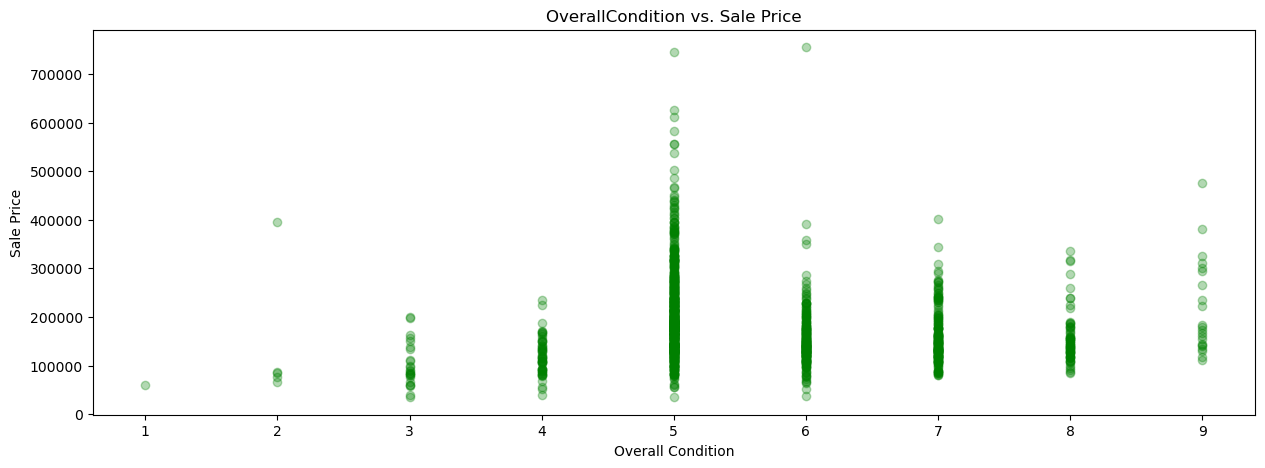

In [13]:
# Setting up the plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["OverallCond"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("OverallCondition vs. Sale Price")
ax.set_xlabel("Overall Condition")
ax.set_ylabel("Sale Price");

In the cell below, interpret the above information.

In [ ]:
"""

The plot above shows how the Overall Condition is related to the SalePrice which indicates that they have no clear relation 
as the dots have no trend clear correlation.
To get the clear correlation we calculate and the result is -0.077856

Also the dots are denser at 5 showing that in most of the houses the Overall Condition is at 5
"""

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [11]:
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [12]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

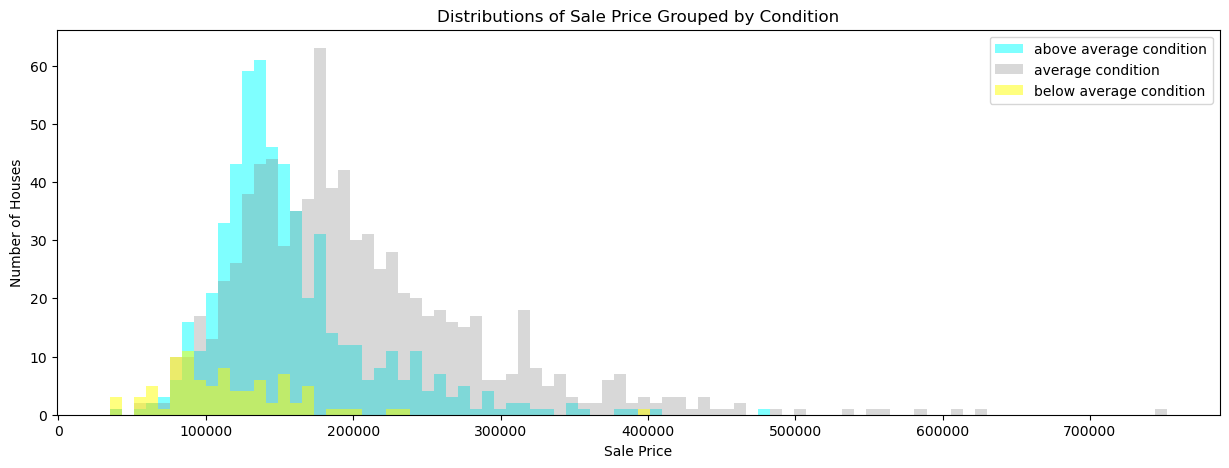

In [16]:
# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [ ]:
# Replace None with appropriate text
"""
The plot describes the Distributions of the SalePrice by the Houses' Overall Condition in Ames Housing.

The histogram with the "cyan" color describes the SalePrice of the houses with the above average condions. 
The histogram with the "grey" color describes the SalePrice of the houses with the average condions.
The histogram with the "yellow" color describes the SalePrice of the houses with the below average condions.

The SalePrice of the average condions houses is high. 
The SalePrice of the  above average condions houses is average.
The SalePrice of the below average condions houses is low.

The surprising part is that the SalePrice of the average condions houses is more than one with above average conditions.
"""

## 4. Cleaning up the data

After understanding the data we clean the data set.

According to the dataset of Ames Housing some categorical columns have NaN values which means that that ammeneties were not built.

Examples:
- Fence
- Alley 
- Garage
- MasVnrType: Masonry veneer type
- BsmtQual; No basement
- Fireplaces
- PoolQc
- MiscFeature

Some houses had Fence built and some no fence were built and so on.

Here i clean only the numerical data columns to avoid having a biased DataFrame

### Identifying missing values

In [19]:
# To check for missing values 
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

### Dropping columns
Dropping the columns that have a lot of null values/ less non-null values and also will not affect the dataset.

For example
- ```LotFrontage``` if we fill the NaN values we will have a biased dataframe  
- Alley has too many null values
- MasVnrType: Masonry veneer type has too many null values
- MiscFeature has too many null values
- PoolQC has too many null values

#### Also
We dont Drop :
- Fence
- Garage
- BsmtQual; No basement
- Fireplaces
-  ```GarageYrBlt``` since as noted some record of houses had no garage That is why it is preferable to retain the GarageYrBlt
and that also applies to Fence and Basement

In [15]:
# Dropping columns
df = df.drop(columns = ['LotFrontage', 'Alley', 'PoolQC', 'MasVnrType', 'MiscFeature'], axis = 1)
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500


### Filling in The NaN values 
In the :
- Fence
- Garage
- BsmtQual; No basement
- Fireplaces

columns we know that these ammeneties are not in some of the house record .

So we fill with ```'Feature Not Available'``` , where there is NA 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyle    

In [17]:
# MasVnrArea has 8 null values so we fill the values with the mean
df['MasVnrArea']= df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [18]:
# Electrical has 1 null value so it is appropriate we fill with the most occuring electrical type 
# we know this by getting the value_counts of the column
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [47]:
df['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [24]:
# The columns with NA values which means that feature is not available we fill it with
# Feature Not Available
df = df.fillna('Feature Not Available')

In [25]:
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,Feature Not Available,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,Feature Not Available,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,Feature Not Available,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,Feature Not Available,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,Feature Not Available,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,Feature Not Available,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500


In [26]:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

## 5. Explore Correlations
### iii. What is the top factor that mostly affect the SalePrice of Housing and the top factor that least affect the                   SalePrice of Housing?


To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cells below, are both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.


In [27]:
# Selecting the numeric columns
num_columns = df.select_dtypes(['float64', 'int64'])

# Calculate correlations
correlations = num_columns.corr()['SalePrice']
print(correlations)

MSSubClass      -0.084284
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64


## iii. To find the top features that mostly and least affect the SalePrice

In [28]:
#Exclude the SalePrice column
# Print the column with the most_positive correlation
SalePrice_most_positively_correlated = correlations[correlations.index != 'SalePrice'].idxmax()


print("The column with the most positive correlation is:", SalePrice_most_positively_correlated )
print(" The value is :", correlations[SalePrice_most_positively_correlated])

The column with the most positive correlation is: OverallQual
 The value is : 0.7909816005838053


Now, find the ***most negatively correlated*** column:

In [29]:
# Exclude the SalePrice column
# Print the column with the most_negatively correlation
most_negative_corr = correlations[correlations.index != 'SalePrice'].idxmin()

print("The column with the most negative correlation is:", most_negative_corr)
print(" The value is :", correlations[most_negative_corr])

The column with the most negative correlation is: KitchenAbvGr
 The value is : -0.13590737084214105


### The top feature that mostly affect  the SalePrice is Overall Quality (```OverallQual```)
### The top feature that least affect  the SalePrice is Kitchen Above Grade (```KitchenAbvGr```)

Plot Boxplots of the columns that mostly and least affect the Sale Price

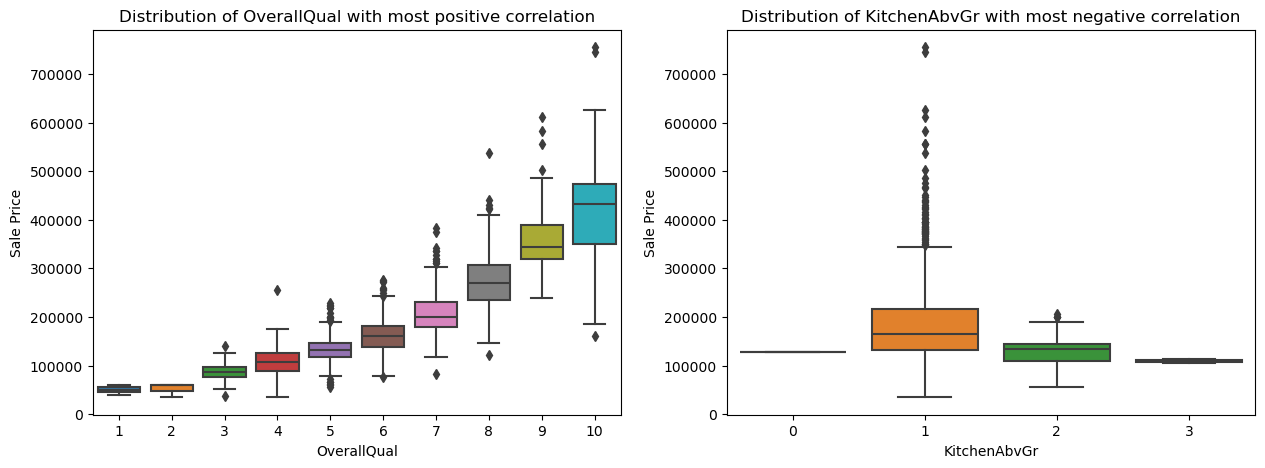

In [57]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['KitchenAbvGr'],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Distribution of OverallQual with most positive correlation")
ax1.set_xlabel("OverallQual")
ax1.set_ylabel("Sale Price")
ax2.set_title("Distribution of KitchenAbvGr with most negative correlation")
ax2.set_xlabel("KitchenAbvGr")
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [ ]:
# Replace None with appropriate text
"""
The first plot (ax1), shows different boxplots of Saleprice according to the Rates the overall material and finish of the house,
which is the Overall Quality.

It Describes the minimum value, lower quatile, median, upper quatile, maximum values, and the outliers of the
SalePrice by the Overall Quality Per Rate.

The Second plot (ax2), shows different boxplots of Saleprice according to Kitchen Above Grade

It Describes the minimum value, lower quatile, median, upper quatile, maximum values, and the outliers of the
SalePrice by the Kitchen Above Grade Per Grade.

The minimum values and maximum values are shown by the whiskers
The median is shown by the middle line at the centre of the box
The box itself shows the Interquatile range which is Q3 - Q1
The lower Quatile is the lower end of the box and the upper Quatile is the upper end of the box

"""

## 6. Engineer and Explore a New Feature
### iv. How does Age affect SalePrice?

Here we are creating a new column ```Age```.

To get the Age of the house we take the ```"YrSold"``` and subtract the ```"YearBuilt"``` columns.

We note that the data spans across several years of sales:

## iv. To find out how Age affects the SalePrice

In [68]:
# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

df['Age'].corr(df['SalePrice'])

-0.523350417546816

In [58]:
# declare the YrSold Column and get the sorted unique count
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

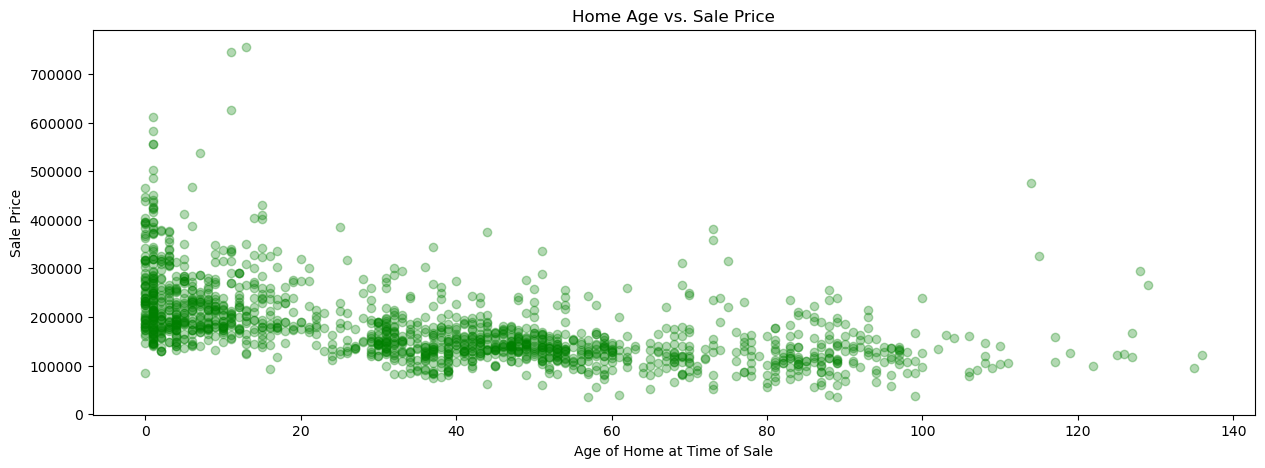

In [70]:
# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpretation of the plot above:

In [ ]:
# Replace None with appropriate text
"""
The plot describes the correlation of Age and Saleprice .

It shows how Age is related to the SalePrice which indicates that they have a negative correlation because the trend of 
the points are moving downwards from left to right.
This means that old houses have low prices.


"""

## Summary
After an exploratory data analysis of the Ames Housing dataset and an inspection of the distribution of individual columns, subsets of columns, correlations, and new engineered features i gathered the findings below:
- Features like:
  * Overall Quality,
  * Rooms above Grade,
  * Overall Conditions mostly contribute to the SalePrice 
- In this dataset :
  * The top feature that mostly affect the SalePrice is Overall Quality (OverallQual)
  * The top feature that least affect the SalePrice is Kitchen Above Grade (KitchenAbvGr)
- The new created column ```Age``` has a negative correlation.
- Also it is surprising to see that the SalePrice of the average condions houses is more than one with above average conditions.

Click on this [link](https://1drv.ms/p/c/7b54cccbf5f8cdab/EUx5bho4tOJLutUAWALJwCABJV_alOB1ZYZjbAjyUeo6Iw) to get the non_technical presentations